In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
city_df = pd.read_csv("Resources/city_data.csv")
ride_df = pd.read_csv("Resources/ride_data.csv")
# city_df.head()
# ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
#Merge both dfs on = city
city_ride_df = pd.merge(city_df, ride_df, on='city')
city_ride_df.head()
# city_ride_df.info()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [22]:
#To create bubble plot, need to get the value by grouping the merged df by city
city_ride_gb = city_ride_df.groupby('city')
avg_fare_by_city = city_ride_gb['fare'].mean()
total_cityRides = city_ride_gb['ride_id'].count()
total_cityDrivers = city_ride_gb['driver_count'].max()
city_type = city_ride_gb['type'].max()
# print(total_cityRides)
# print(city_type) --> Need to use a function to be able to print the values!
# print(city_type)
bubble_dict = {"Average Fare By City":avg_fare_by_city,
               "City Type":city_type,
               "Total Rides By City":total_cityRides,
               "Total Drivers By City":total_cityDrivers
              }

#create a df with above dict to manipulat the scatter/bubble plot variables
bubble_df = pd.DataFrame(data = bubble_dict)
bubble_df.head()

,Average Fare By City,City Type,Total Drivers By City,Total Rides By City
city,,,,
Amandaburgh,24.641667,Urban,12,18
Barajasview,25.332273,Urban,26,22
Barronchester,36.422500,Suburban,11,16
Bethanyland,32.956111,Suburban,22,18
Bradshawfurt,40.064000,Rural,7,10


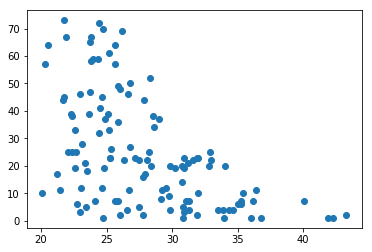

In [25]:
plt.scatter(bubble_df['Average Fare By City'],bubble_df['Total Drivers By City'])